In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/datasets.zip'  # Replace with your zip file name

# Create a directory to extract the files
extract_dir = '/content'
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to: {extract_dir}')


Files extracted to: /content


In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/test.zip'  # Replace with your zip file name

# Create a directory to extract the files
extract_dir = '/content'
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to: {extract_dir}')


Files extracted to: /content


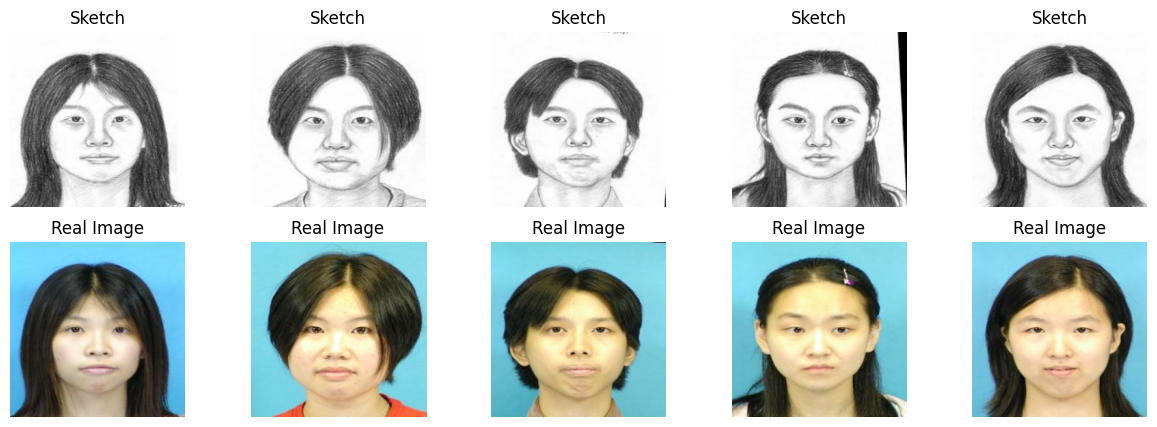

Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.


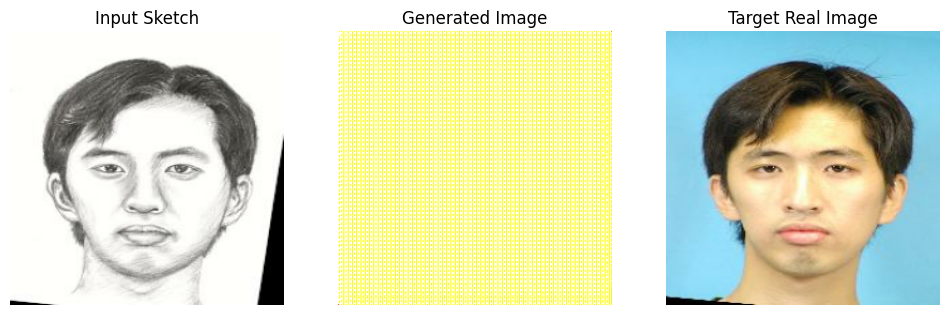

Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.


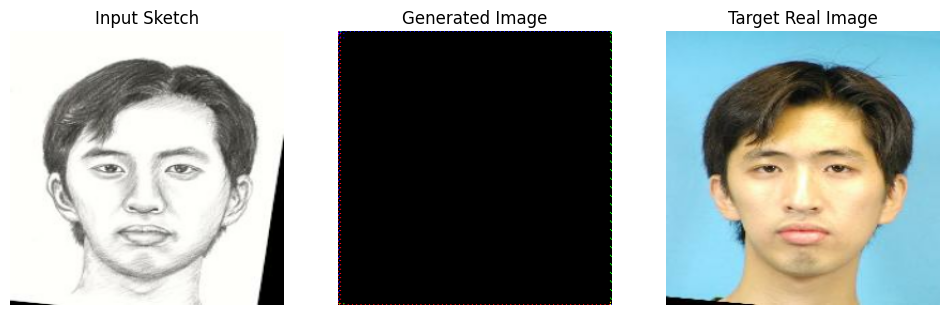

Epoch 40/100 completed.
Epoch 41/100 completed.
Epoch 42/100 completed.
Epoch 43/100 completed.
Epoch 44/100 completed.
Epoch 45/100 completed.
Epoch 46/100 completed.
Epoch 47/100 completed.
Epoch 48/100 completed.
Epoch 49/100 completed.
Epoch 50/100 completed.
Epoch 51/100 completed.
Epoch 52/100 completed.
Epoch 53/100 completed.
Epoch 54/100 completed.
Epoch 55/100 completed.
Epoch 56/100 completed.
Epoch 57/100 completed.
Epoch 58/100 completed.
Epoch 59/100 completed.


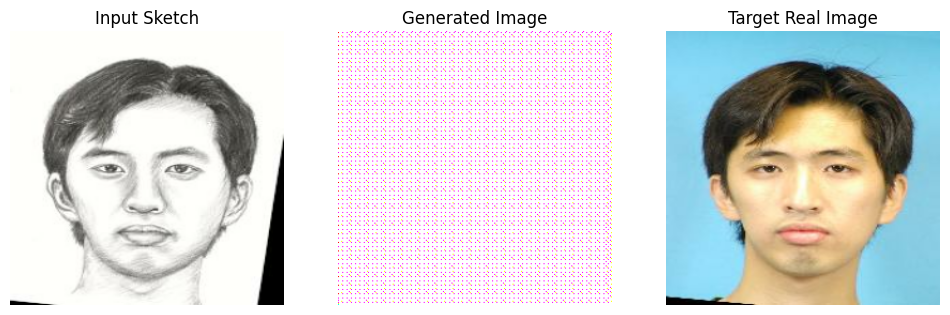

Epoch 60/100 completed.
Epoch 61/100 completed.
Epoch 62/100 completed.
Epoch 63/100 completed.
Epoch 64/100 completed.
Epoch 65/100 completed.
Epoch 66/100 completed.
Epoch 67/100 completed.
Epoch 68/100 completed.
Epoch 69/100 completed.
Epoch 70/100 completed.
Epoch 71/100 completed.
Epoch 72/100 completed.
Epoch 73/100 completed.
Epoch 74/100 completed.
Epoch 75/100 completed.
Epoch 76/100 completed.
Epoch 77/100 completed.
Epoch 78/100 completed.
Epoch 79/100 completed.


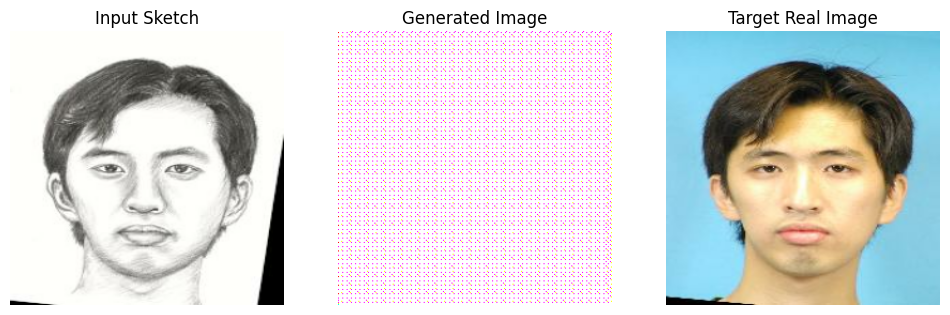

Epoch 80/100 completed.
Epoch 81/100 completed.
Epoch 82/100 completed.
Epoch 83/100 completed.
Epoch 84/100 completed.
Epoch 85/100 completed.
Epoch 86/100 completed.
Epoch 87/100 completed.
Epoch 88/100 completed.
Epoch 89/100 completed.
Epoch 90/100 completed.
Epoch 91/100 completed.
Epoch 92/100 completed.
Epoch 93/100 completed.
Epoch 94/100 completed.
Epoch 95/100 completed.
Epoch 96/100 completed.
Epoch 97/100 completed.
Epoch 98/100 completed.
Epoch 99/100 completed.


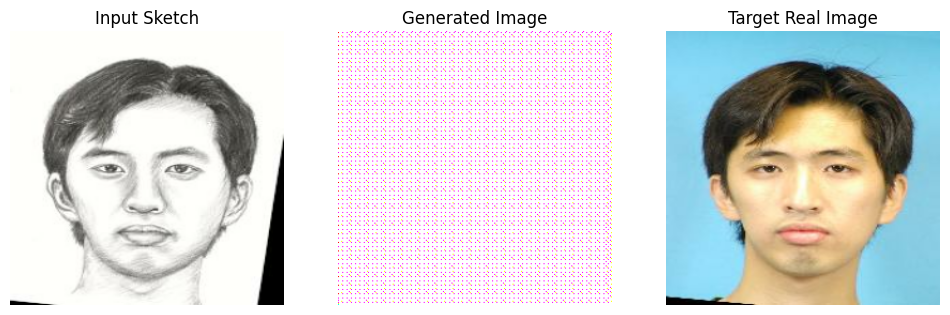

Epoch 100/100 completed.


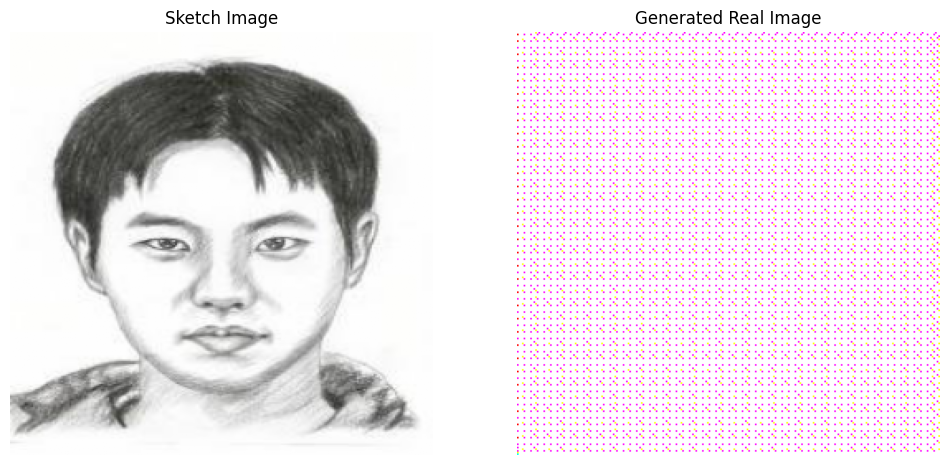

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# Set paths
TRAINING_SKETCHES_PATH = '/content/datasets/sketches'
TRAINING_PHOTOS_PATH = '/content/datasets/photos'
TESTING_SKETCHES_PATH = '/content/Testing sketch'
TESTING_PHOTOS_PATH = '/content/Testing photo'

IMG_HEIGHT, IMG_WIDTH = 256, 256

# Load and preprocess images
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

def load_images_sorted(path):
    filenames = sorted(os.listdir(path))
    images = []
    for filename in filenames:
        img_path = os.path.join(path, filename)
        img = load_image(img_path)
        images.append(img)
    return np.array(images)

def load_dataset(sketches_path, photos_path):
    sketches = load_images_sorted(sketches_path)
    photos = load_images_sorted(photos_path)

    # Ensure we only pair images that exist in both lists
    dataset = []
    num_samples = min(len(sketches), len(photos))

    for i in range(num_samples):
        dataset.append((sketches[i], photos[i]))

    return dataset

# Display a few images with labels
def display_sample_images(dataset, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(dataset))):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow((dataset[i][0] + 1) / 2)  # Sketch
        plt.title("Sketch")
        plt.axis('off')

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow((dataset[i][1] + 1) / 2)  # Real Image
        plt.title("Real Image")
        plt.axis('off')
    plt.show()

# Create the generator model
def build_generator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    # Encoder
    x = layers.Conv2D(64, (4, 4), strides=2, padding='same')(inputs)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(128, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(256, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(512, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Bottleneck
    x = layers.Conv2D(512, (4, 4), padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (4, 4), strides=2, padding='same')(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(128, (4, 4), strides=2, padding='same')(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(64, (4, 4), strides=2, padding='same')(x)
    x = layers.ReLU()(x)

    outputs = layers.Conv2DTranspose(3, (4, 4), strides=2, padding='same', activation='tanh')(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Create the discriminator model
def build_discriminator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    x = layers.Conv2D(64, (4, 4), strides=2, padding='same')(inputs)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(128, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(256, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2D(512, (4, 4), strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    outputs = layers.Conv2D(1, (4, 4), padding='same')(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile and train the model
generator = build_generator()
discriminator = build_discriminator()

# Define loss functions and optimizers
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Training loop
@tf.function
def train_step(real_image, sketch_image):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image = generator(sketch_image, training=True)

        real_output = discriminator(real_image, training=True)
        fake_output = discriminator(generated_image, training=True)

        gen_loss = loss_object(tf.ones_like(fake_output), fake_output)
        disc_loss = loss_object(tf.ones_like(real_output), real_output) + \
                    loss_object(tf.zeros_like(fake_output), fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Load dataset
dataset = load_dataset(TRAINING_SKETCHES_PATH, TRAINING_PHOTOS_PATH)

# Display sample images
display_sample_images(dataset, num_samples=5)

epochs = 100  # Adjust as needed

# Train the model
for epoch in range(epochs):
    for sketch_image, real_image in dataset:
        sketch_image = tf.expand_dims(sketch_image, axis=0)
        real_image = tf.expand_dims(real_image, axis=0)
        train_step(real_image, sketch_image)

    if (epoch + 1) % 20 == 0:
        # Display input, generated, and target images
        plt.figure(figsize=(12, 6))

        # Input Sketch
        plt.subplot(1, 3, 1)
        plt.imshow((sketch_image[0] + 1) / 2)  # Rescale to [0, 1]
        plt.title("Input Sketch")
        plt.axis('off')

        # Generated Image
        generated_image = generator(sketch_image, training=False)
        plt.subplot(1, 3, 2)
        plt.imshow((generated_image[0] + 1) / 2)  # Rescale to [0, 1]
        plt.title("Generated Image")
        plt.axis('off')

        # Target Real Image
        plt.subplot(1, 3, 3)
        plt.imshow((real_image[0] + 1) / 2)  # Rescale to [0, 1]
        plt.title("Target Real Image")
        plt.axis('off')

        plt.show()

    print(f'Epoch {epoch + 1}/{epochs} completed.')

# Save the model
generator.save('sketch_to_real_generator.h5')
discriminator.save('sketch_to_real_discriminator.h5')

# Test the model with a sketch image
def generate_images(generator, sketch_path):
    sketch_image = load_image(sketch_path)
    sketch_image = tf.expand_dims(sketch_image, axis=0)  # Add batch dimension

    generated_image = generator(sketch_image, training=False)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Sketch Image')
    plt.imshow((sketch_image[0] + 1) / 2)  # Rescale to [0, 1]
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Generated Real Image')
    plt.imshow((generated_image[0] + 1) / 2)  # Rescale to [0, 1]
    plt.axis('off')

    plt.show()

# Test the model with a sketch image
generate_images(generator, '/content/Testing sketch/m1-040-01-sz1.jpg')  # Replace with your test sketch path


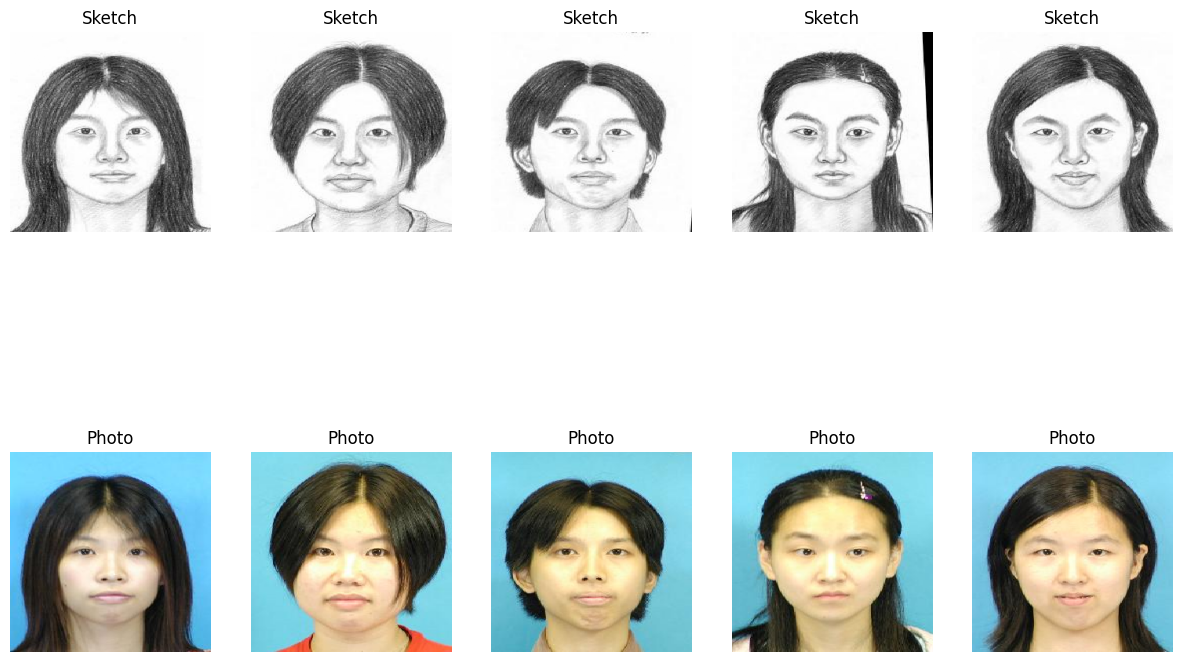

Epoch 1/250 - Generator Loss: 26.200763702392578, Discriminator Loss: 1.253713607788086
Epoch 2/250 - Generator Loss: 24.023630142211914, Discriminator Loss: 0.9110230207443237
Epoch 3/250 - Generator Loss: 23.792133331298828, Discriminator Loss: 0.7891181707382202
Epoch 4/250 - Generator Loss: 23.640493392944336, Discriminator Loss: 0.8171547651290894
Epoch 5/250 - Generator Loss: 23.3269100189209, Discriminator Loss: 0.8248035907745361
Epoch 6/250 - Generator Loss: 23.031259536743164, Discriminator Loss: 0.8422166705131531
Epoch 7/250 - Generator Loss: 22.70641326904297, Discriminator Loss: 0.8631525039672852
Epoch 8/250 - Generator Loss: 22.208742141723633, Discriminator Loss: 0.8959840536117554
Epoch 9/250 - Generator Loss: 21.805742263793945, Discriminator Loss: 0.8995391130447388
Epoch 10/250 - Generator Loss: 21.465147018432617, Discriminator Loss: 0.8888793587684631
Epoch 11/250 - Generator Loss: 20.64834213256836, Discriminator Loss: 0.9460933208465576
Epoch 12/250 - Generator

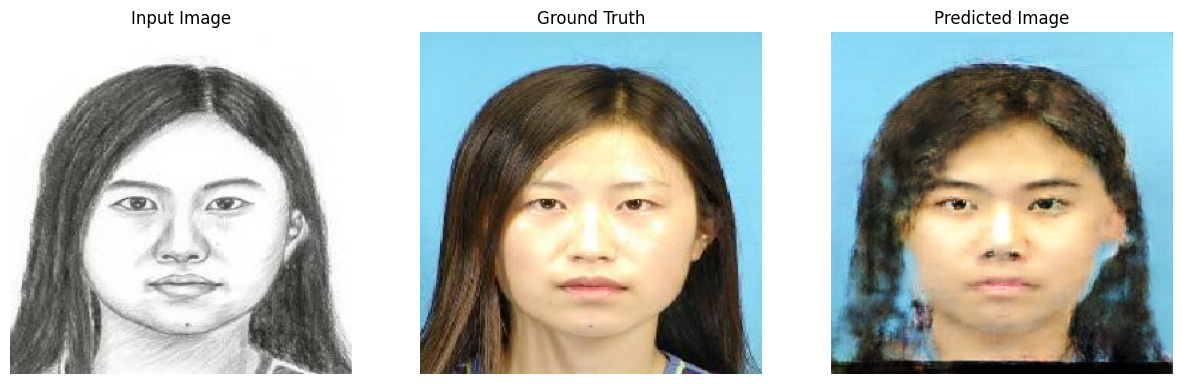

Epoch 101/250 - Generator Loss: 8.710283279418945, Discriminator Loss: 0.7733392715454102
Epoch 102/250 - Generator Loss: 8.597996711730957, Discriminator Loss: 0.825890064239502
Epoch 103/250 - Generator Loss: 8.413086891174316, Discriminator Loss: 0.7992715835571289
Epoch 104/250 - Generator Loss: 8.180282592773438, Discriminator Loss: 0.8525153398513794
Epoch 105/250 - Generator Loss: 8.479623794555664, Discriminator Loss: 0.7218595743179321
Epoch 106/250 - Generator Loss: 8.826014518737793, Discriminator Loss: 0.6837877035140991
Epoch 107/250 - Generator Loss: 9.009719848632812, Discriminator Loss: 0.6725937128067017
Epoch 108/250 - Generator Loss: 8.456438064575195, Discriminator Loss: 0.7672026753425598
Epoch 109/250 - Generator Loss: 8.502436637878418, Discriminator Loss: 0.8058973550796509
Epoch 110/250 - Generator Loss: 8.546405792236328, Discriminator Loss: 0.713312029838562
Epoch 111/250 - Generator Loss: 8.490017890930176, Discriminator Loss: 0.7634979486465454
Epoch 112/25

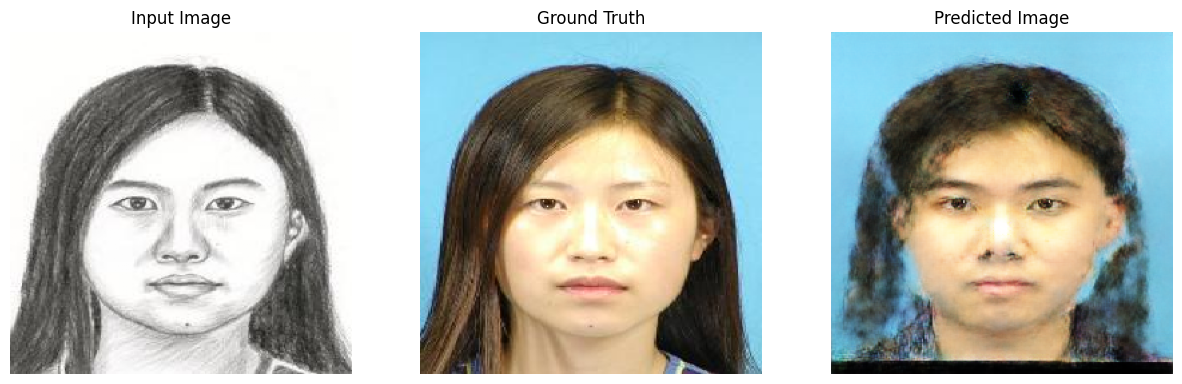

Epoch 201/250 - Generator Loss: 8.029378890991211, Discriminator Loss: 0.5527359247207642
Epoch 202/250 - Generator Loss: 7.711126327514648, Discriminator Loss: 0.8481582999229431
Epoch 203/250 - Generator Loss: 7.560550689697266, Discriminator Loss: 0.6191191077232361
Epoch 204/250 - Generator Loss: 7.804545879364014, Discriminator Loss: 0.6837048530578613
Epoch 205/250 - Generator Loss: 7.699758529663086, Discriminator Loss: 0.6625136137008667
Epoch 206/250 - Generator Loss: 7.787646770477295, Discriminator Loss: 0.523091197013855
Epoch 207/250 - Generator Loss: 7.8142571449279785, Discriminator Loss: 0.5492417216300964
Epoch 208/250 - Generator Loss: 7.96820592880249, Discriminator Loss: 0.5672522783279419
Epoch 209/250 - Generator Loss: 7.758869647979736, Discriminator Loss: 0.6535466909408569
Epoch 210/250 - Generator Loss: 7.49628210067749, Discriminator Loss: 1.473141074180603
Epoch 211/250 - Generator Loss: 7.486414909362793, Discriminator Loss: 0.5491552948951721
Epoch 212/250

Epoch 250/250 - Generator Loss: 7.9742431640625, Discriminator Loss: 0.40175026655197144


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Dropout, Concatenate, Conv2DTranspose
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Set the paths for the dataset
Training_sketches_path = '/content/datasets/sketches'
Training_photos_path = '/content/datasets/photos'
Testing_sketches_path = '/content/Testing sketch'
Testing_photos_path = '/content/Testing photo'

# Image size
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

def load_images_sorted(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    filenames = sorted(os.listdir(path))
    images = []
    for filename in filenames:
        img_path = os.path.join(path, filename)
        img = load_img(img_path, target_size=size)
        img = img_to_array(img)
        img = (img - 127.5) / 127.5  # normalize to [-1, 1]
        images.append(img)
    return np.array(images)

def build_discriminator():
    init = tf.keras.initializers.RandomNormal(0., 0.02)
    inp = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='input_image')
    tar = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='target_image')

    x = Concatenate()([inp, tar])

    down1 = Conv2D(64, 4, strides=2, padding='same', kernel_initializer=init)(x)
    down1 = LeakyReLU()(down1)

    down2 = Conv2D(128, 4, strides=2, padding='same', kernel_initializer=init)(down1)
    down2 = BatchNormalization()(down2)
    down2 = LeakyReLU()(down2)

    down3 = Conv2D(256, 4, strides=2, padding='same', kernel_initializer=init)(down2)
    down3 = BatchNormalization()(down3)
    down3 = LeakyReLU()(down3)

    down4 = Conv2D(512, 4, strides=1, padding='same', kernel_initializer=init)(down3)
    down4 = BatchNormalization()(down4)
    down4 = LeakyReLU()(down4)

    last = Conv2D(1, 4, strides=1, padding='same', kernel_initializer=init)(down4)

    return Model(inputs=[inp, tar], outputs=last)

def build_generator():
    init = tf.keras.initializers.RandomNormal(0., 0.02)

    def downsample(filters, size, apply_batchnorm=True):
        result = tf.keras.Sequential()
        result.add(Conv2D(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        if apply_batchnorm:
            result.add(BatchNormalization())
        result.add(LeakyReLU())
        return result

    def upsample(filters, size, apply_dropout=False):
        result = tf.keras.Sequential()
        result.add(Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        result.add(BatchNormalization())
        if apply_dropout:
            result.add(Dropout(0.5))
        result.add(LeakyReLU())
        return result

    inputs = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    last = Conv2DTranspose(IMG_CHANNELS, 4, strides=2, padding='same', kernel_initializer=init, activation='tanh')

    x = inputs

    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)

    return Model(inputs=inputs, outputs=x)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss

def generate_images(model, test_input, tar, epoch):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.savefig(f'epoch_{epoch}_output.png')
    plt.show()

def display_samples(sketch_images, photo_images, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.title('Sketch')
        plt.imshow((sketch_images[i] * 0.5) + 0.5)  # Convert [-1, 1] to [0, 1]
        plt.axis('off')

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.title('Photo')
        plt.imshow((photo_images[i] * 0.5) + 0.5)  # Convert [-1, 1] to [0, 1]
        plt.axis('off')

    plt.show()

# Load and sort images
train_sketch_images = load_images_sorted(Training_sketches_path)
train_photo_images = load_images_sorted(Training_photos_path)
test_sketch_images = load_images_sorted(Testing_sketches_path)
test_photo_images = load_images_sorted(Testing_photos_path)

# Display some samples from the training data
display_samples(train_sketch_images, train_photo_images)

# Define models
generator = build_generator()
discriminator = build_discriminator()

# Define optimizers
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

# Training parameters
EPOCHS = 250
BATCH_SIZE = 1
BUFFER_SIZE = 1000

@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)
        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

def fit(train_sketches, train_photos, epochs, test_sketches, test_photos):
    for epoch in range(epochs):
        gen_losses = []
        disc_losses = []
        for sketch, photo in zip(train_sketches, train_photos):
            gen_loss, disc_loss = train_step(np.expand_dims(sketch, 0), np.expand_dims(photo, 0))
            gen_losses.append(gen_loss)
            disc_losses.append(disc_loss)

        print(f"Epoch {epoch + 1}/{epochs} - Generator Loss: {np.mean(gen_losses)}, Discriminator Loss: {np.mean(disc_losses)}")

        if (epoch + 1) % 100 == 0:
            for test_sketch, test_photo in zip(test_sketches[:1], test_photos[:1]):
                generate_images(generator, np.expand_dims(test_sketch, 0), np.expand_dims(test_photo, 0), epoch + 1)

        if (epoch + 1) % 250 == 0:
            generator.save(f'/content/generator_epoch_{epoch + 1}.h5')

# Train the model
fit(train_sketch_images, train_photo_images, EPOCHS, test_sketch_images, test_photo_images)


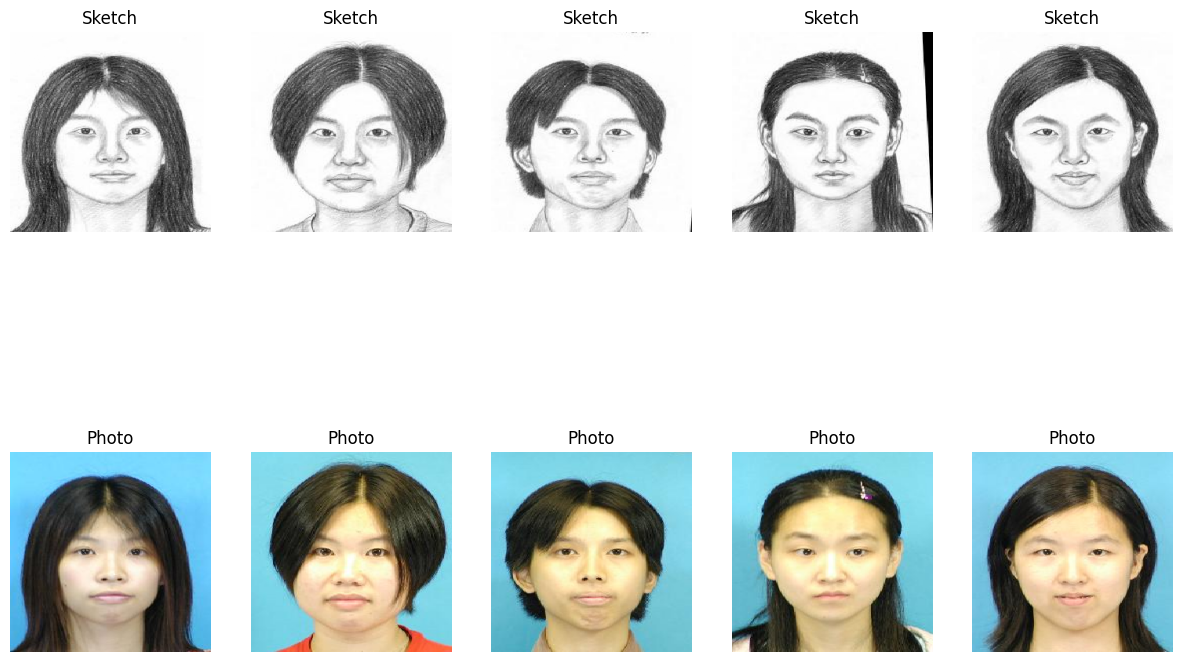

Epoch 1/100 - Generator Loss: 5.821052551269531, Discriminator Loss: 1.4544856548309326
Epoch 2/100 - Generator Loss: 5.980890274047852, Discriminator Loss: 1.3956427574157715
Epoch 3/100 - Generator Loss: 5.551403999328613, Discriminator Loss: 1.396299123764038
Epoch 4/100 - Generator Loss: 5.434723377227783, Discriminator Loss: 1.3931794166564941
Epoch 5/100 - Generator Loss: 5.435056209564209, Discriminator Loss: 1.3930548429489136
Epoch 6/100 - Generator Loss: 5.4071946144104, Discriminator Loss: 1.3926953077316284
Epoch 7/100 - Generator Loss: 5.314741134643555, Discriminator Loss: 1.39228355884552
Epoch 8/100 - Generator Loss: 5.156909465789795, Discriminator Loss: 1.3917744159698486
Epoch 9/100 - Generator Loss: 5.16924524307251, Discriminator Loss: 1.3914673328399658
Epoch 10/100 - Generator Loss: 5.0966081619262695, Discriminator Loss: 1.3867300748825073
Epoch 11/100 - Generator Loss: 5.060150146484375, Discriminator Loss: 1.3858672380447388
Epoch 12/100 - Generator Loss: 5.05

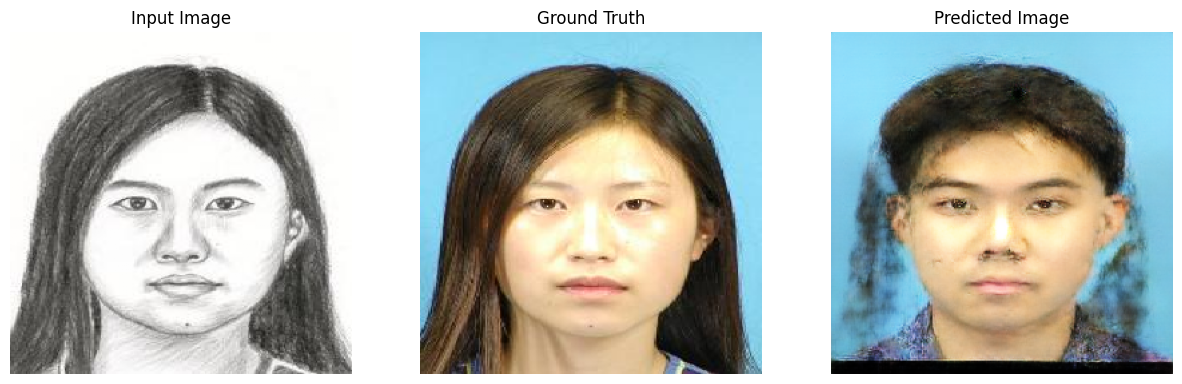

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Dropout, Concatenate, Conv2DTranspose
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Set the paths for the dataset
Training_sketches_path = '/content/datasets/sketches'
Training_photos_path = '/content/datasets/photos'
Testing_sketches_path = '/content/Testing sketch'
Testing_photos_path = '/content/Testing photo'

# Image size
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

def load_images_sorted(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    filenames = sorted(os.listdir(path))
    images = []
    for filename in filenames:
        img_path = os.path.join(path, filename)
        img = load_img(img_path, target_size=size)
        img = img_to_array(img)
        img = (img - 127.5) / 127.5  # normalize to [-1, 1]
        images.append(img)
    return np.array(images)

def build_discriminator():
    init = tf.keras.initializers.RandomNormal(0., 0.02)
    inp = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='input_image')
    tar = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='target_image')

    x = Concatenate()([inp, tar])

    down1 = Conv2D(64, 4, strides=2, padding='same', kernel_initializer=init)(x)
    down1 = LeakyReLU()(down1)

    down2 = Conv2D(128, 4, strides=2, padding='same', kernel_initializer=init)(down1)
    down2 = BatchNormalization()(down2)
    down2 = LeakyReLU()(down2)

    down3 = Conv2D(256, 4, strides=2, padding='same', kernel_initializer=init)(down2)
    down3 = BatchNormalization()(down3)
    down3 = LeakyReLU()(down3)

    down4 = Conv2D(512, 4, strides=1, padding='same', kernel_initializer=init)(down3)
    down4 = BatchNormalization()(down4)
    down4 = LeakyReLU()(down4)

    last = Conv2D(1, 4, strides=1, padding='same', kernel_initializer=init)(down4)

    return Model(inputs=[inp, tar], outputs=last)

def build_generator():
    init = tf.keras.initializers.RandomNormal(0., 0.02)

    def downsample(filters, size, apply_batchnorm=True):
        result = tf.keras.Sequential()
        result.add(Conv2D(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        if apply_batchnorm:
            result.add(BatchNormalization())
        result.add(LeakyReLU())
        return result

    def upsample(filters, size, apply_dropout=False):
        result = tf.keras.Sequential()
        result.add(Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        result.add(BatchNormalization())
        if apply_dropout:
            result.add(Dropout(0.5))
        result.add(LeakyReLU())
        return result

    inputs = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    last = Conv2DTranspose(IMG_CHANNELS, 4, strides=2, padding='same', kernel_initializer=init, activation='tanh')

    x = inputs

    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)

    return Model(inputs=inputs, outputs=x)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss

def generate_images(model, test_input, tar, epoch):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.savefig(f'epoch_{epoch}_output.png')
    plt.show()

def display_samples(sketch_images, photo_images, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.title('Sketch')
        plt.imshow((sketch_images[i] * 0.5) + 0.5)  # Convert [-1, 1] to [0, 1]
        plt.axis('off')

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.title('Photo')
        plt.imshow((photo_images[i] * 0.5) + 0.5)  # Convert [-1, 1] to [0, 1]
        plt.axis('off')

    plt.show()

# Load and sort images
train_sketch_images = load_images_sorted(Training_sketches_path)
train_photo_images = load_images_sorted(Training_photos_path)
test_sketch_images = load_images_sorted(Testing_sketches_path)
test_photo_images = load_images_sorted(Testing_photos_path)

# Display some samples from the training data
display_samples(train_sketch_images, train_photo_images)

# Load pre-trained models
generator = load_model('/content/generator_epoch_250.h5', compile=False)
discriminator = build_discriminator()  # Assuming discriminator model is similar

# Define optimizers
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

# Training parameters
ADDITIONAL_EPOCHS = 100  # Number of additional epochs to train
BATCH_SIZE = 1
BUFFER_SIZE = 1000

@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)
        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

def fit(train_sketches, train_photos, epochs, test_sketches, test_photos):
    for epoch in range(epochs):
        gen_losses = []
        disc_losses = []
        for sketch, photo in zip(train_sketches, train_photos):
            gen_loss, disc_loss = train_step(np.expand_dims(sketch, 0), np.expand_dims(photo, 0))
            gen_losses.append(gen_loss)
            disc_losses.append(disc_loss)

        print(f"Epoch {epoch + 1}/{epochs} - Generator Loss: {np.mean(gen_losses)}, Discriminator Loss: {np.mean(disc_losses)}")

        if (epoch + 1) % 100 == 0:
            for test_sketch, test_photo in zip(test_sketches[:1], test_photos[:1]):
                generate_images(generator, np.expand_dims(test_sketch, 0), np.expand_dims(test_photo, 0), epoch + 1)

        if (epoch + 1) % 250 == 0:
            generator.save(f'/content/generator_epoch_{epoch + 1}.h5')

# Continue training the model
fit(train_sketch_images, train_photo_images, ADDITIONAL_EPOCHS, test_sketch_images, test_photo_images)


In [ ]:
# Set the paths for the dataset
sketches_path = '/content/datasets/sketches'
photos_path = '/content/datasets/photos'

# Image size
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

def load_images(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    images = []
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = load_img(img_path, target_size=size)
        img = img_to_array(img)
        img = (img - 127.5) / 127.5  # normalize to [-1, 1]
        images.append(img)
    return np.array(images)

In [ ]:
def build_discriminator():
    init = tf.random_normal_initializer(0., 0.02)
    inp = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='input_image')
    tar = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS], name='target_image')

    x = Concatenate()([inp, tar])

    down1 = Conv2D(64, 4, strides=2, padding='same', kernel_initializer=init)(x)
    down1 = LeakyReLU()(down1)

    down2 = Conv2D(128, 4, strides=2, padding='same', kernel_initializer=init)(down1)
    down2 = BatchNormalization()(down2)
    down2 = LeakyReLU()(down2)

    down3 = Conv2D(256, 4, strides=2, padding='same', kernel_initializer=init)(down2)
    down3 = BatchNormalization()(down3)
    down3 = LeakyReLU()(down3)

    down4 = Conv2D(512, 4, strides=1, padding='same', kernel_initializer=init)(down3)
    down4 = BatchNormalization()(down4)
    down4 = LeakyReLU()(down4)

    last = Conv2D(1, 4, strides=1, padding='same', kernel_initializer=init)(down4)

    return Model(inputs=[inp, tar], outputs=last)

In [ ]:
def build_generator():
    init = tf.random_normal_initializer(0., 0.02)

    def downsample(filters, size, apply_batchnorm=True):
        result = tf.keras.Sequential()
        result.add(Conv2D(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        if apply_batchnorm:
            result.add(BatchNormalization())
        result.add(LeakyReLU())
        return result
        inputs = Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = Conv2DTranspose(IMG_CHANNELS, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')

    x = inputs

    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)

    return Model(inputs=inputs, outputs=x)

In [ ]:
def upsample(filters, size, apply_dropout=False):
        result = tf.keras.Sequential()
        result.add(Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=init, use_bias=False))
        result.add(BatchNormalization())
        if apply_dropout:
            result.add(Dropout(0.5))
        result.add(LeakyReLU())
        return result


In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss


In [ ]:
def generate_images(model, test_input, tar, epoch):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.savefig(f'epoch_{epoch}_output.png')
    plt.show()

# Load images
sketch_images = load_images(sketches_path)
photo_images = load_images(photos_path)

# Split data into train and test sets
train_sketches = sketch_images[:int(0.8 * len(sketch_images))]
train_photos = photo_images[:int(0.8 * len(photo_images))]
test_sketches = sketch_images[int(0.8 * len(sketch_images)):]
test_photos = photo_images[int(0.8 * len(photo_images)):]

# Define models
generator = build_generator()
discriminator = build_discriminator()

# Define optimizers
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

# Training parameters
EPOCHS = 500
BATCH_SIZE = 1
BUFFER_SIZE = 1000

@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)
        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

def fit(train_sketches, train_photos, epochs, test_sketches, test_photos):
    for epoch in range(epochs):
        for sketch, photo in zip(train_sketches, train_photos):
            train_step(np.expand_dims(sketch, 0), np.expand_dims(photo, 0))

        if (epoch + 1) % 100 == 0:
            for test_sketch, test_photo in zip(test_sketches[:1], test_photos[:1]):
                generate_images(generator, np.expand_dims(test_sketch, 0), np.expand_dims(test_photo, 0), epoch + 1)

        if (epoch + 1) % 500 == 0:
            generator.save(f'generator_epoch_{epoch + 1}.h5')

# Train the model
fit(train_sketches, train_photos, EPOCHS, test_sketches, test_photos)

NameError: name 'init' is not defined

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def load_images(path, size=(256, 256)):
    images = []
    for filename in os.listdir(path):
        img = load_img(os.path.join(path, filename), target_size=size)
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

sketches_path = '/content/datasets/sketches'
photos_path = '/content/datasets/photos'

sketches = load_images(sketches_path)
photos = load_images(photos_path)

# Normalize images to [-1, 1]
sketches = (sketches - 127.5) / 127.5
photos = (photos - 127.5) / 127.5


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, BatchNormalization, Dropout, LeakyReLU, Activation

def build_generator(input_shape):
    def conv_block(x, filters, kernel_size=4, strides=2, activation='relu', batch_norm=True, dropout_rate=0.0):
        x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        if batch_norm:
            x = BatchNormalization()(x)
        if dropout_rate > 0:
            x = Dropout(dropout_rate)(x)
        if activation:
            x = LeakyReLU(alpha=0.2)(x) if activation == 'leaky_relu' else Activation(activation)(x)
        return x

    def deconv_block(x, skip_input, filters, kernel_size=4, strides=2, activation='relu', dropout_rate=0.0):
        x = Conv2DTranspose(filters, kernel_size, strides=strides, padding='same')(x)
        x = BatchNormalization()(x)
        if dropout_rate > 0:
            x = Dropout(dropout_rate)(x)
        x = Activation(activation)(x)
        x = Concatenate()([x, skip_input])
        return x

    inputs = Input(shape=input_shape)

    # Encoder
    e1 = conv_block(inputs, 64, activation='leaky_relu', batch_norm=False)
    e2 = conv_block(e1, 128, activation='leaky_relu')
    e3 = conv_block(e2, 256, activation='leaky_relu')
    e4 = conv_block(e3, 512, activation='leaky_relu', dropout_rate=0.5)
    e5 = conv_block(e4, 512, activation='leaky_relu', dropout_rate=0.5)
    e6 = conv_block(e5, 512, activation='leaky_relu', dropout_rate=0.5)
    e7 = conv_block(e6, 512, activation='leaky_relu', dropout_rate=0.5)
    e8 = conv_block(e7, 512, activation='leaky_relu', batch_norm=False)

    # Decoder
    d1 = deconv_block(e8, e7, 512, dropout_rate=0.5)
    d2 = deconv_block(d1, e6, 512, dropout_rate=0.5)
    d3 = deconv_block(d2, e5, 512, dropout_rate=0.5)
    d4 = deconv_block(d3, e4, 512)
    d5 = deconv_block(d4, e3, 256)
    d6 = deconv_block(d5, e2, 128)
    d7 = deconv_block(d6, e1, 64)

    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')(d7)

    return Model(inputs, outputs)

generator = build_generator((256, 256, 3))
generator.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 128, 128, 64)   │          3,136 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_12            │ (None, 128, 128, 64)   │              0 │ conv2d_13[0][0]        │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 64, 64, 128)    │        131,200 │ leaky_re_lu_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 64, 64, 128)    │            512 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_13            │ (None, 64, 64, 128)    │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 32, 32, 256)    │        524,544 │ leaky_re_lu_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 32, 32, 256)    │          1,024 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_14            │ (None, 32, 32, 256)    │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 16, 16, 512)    │      2,097,664 │ leaky_re_lu_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 16, 16, 512)    │          2,048 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 16, 16, 512)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_15            │ (None, 16, 16, 512)    │              0 │ dropout_7[0][0]        │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 8, 8, 512)      │      4,194,816 │ leaky_re_lu_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 8, 8, 512)      │          2,048 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 54,429,315 (207.63 MB)

 Trainable params: 54,419,459 (207.59 MB)

 Non-trainable params: 9,856 (38.50 KB)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_discriminator(input_shape):
    def disc_block(x, filters, kernel_size=4, strides=2, activation='leaky_relu', batch_norm=True):
        x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        if batch_norm:
            x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.2)(x)
        return x

    input_photo = Input(shape=input_shape)
    input_sketch = Input(shape=input_shape)
    combined = Concatenate()([input_photo, input_sketch])

    d1 = disc_block(combined, 64, batch_norm=False)
    d2 = disc_block(d1, 128)
    d3 = disc_block(d2, 256)
    d4 = disc_block(d3, 512)

    outputs = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

    return Model([input_photo, input_sketch], outputs)

discriminator = build_discriminator((256, 256, 3))
discriminator.compile(loss='mse', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_15            │ (None, 256, 256, 6)    │              0 │ input_layer_4[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 64)   │          6,208 │ concatenate_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_20            │ (None, 128, 128, 64)   │              0 │ conv2d_21[0][0]        │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 64, 64, 128)    │        131,200 │ leaky_re_lu_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_29    │ (None, 64, 64, 128)    │            512 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_21            │ (None, 64, 64, 128)    │              0 │ batch_normalization_2… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 32, 32, 256)    │        524,544 │ leaky_re_lu_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 32, 32, 256)    │          1,024 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_22            │ (None, 32, 32, 256)    │              0 │ batch_normalization_3… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 16, 16, 512)    │      2,097,664 │ leaky_re_lu_22[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_31    │ (None, 16, 16, 512)    │          2,048 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_23            │ (None, 16, 16, 512)    │              0 │ batch_normalization_3… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)   

 Total params: 2,771,393 (10.57 MB)

 Trainable params: 2,769,601 (10.57 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
def train_gan(sketches, photos, epochs=1000, batch_size=64, save_interval=200):
    real = np.ones((batch_size, 16, 16, 1))
    fake = np.zeros((batch_size, 16, 16, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, sketches.shape[0], batch_size)
        real_sketches = sketches[idx]
        real_photos = photos[idx]
        fake_photos = generator.predict(real_sketches)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch([real_photos, real_sketches], real)
        d_loss_fake = discriminator.train_on_batch([fake_photos, real_sketches], fake)
        d_loss = 0.5 * np.add(d_loss_real[0], d_loss_fake[0])  # Unpack the first element (loss)

        # Train the GAN
        g_loss = gan.train_on_batch(real_sketches, real)[0]  # Unpack the first element (loss)

        if epoch % 100 == 0:
            print(f'Epoch {epoch} / {epochs} - D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}')
            save_images(epoch, real_sketches, fake_photos)

        if epoch % 500 == 0 or epoch == 1000:  # Corrected condition
            generator.save(f'generator_model_epoch_{epoch}.keras')  # Changed to .keras
            discriminator.save(f'discriminator_model_epoch_{epoch}.keras')  # Changed to .keras
            gan.save(f'gan_model_epoch_{epoch}.keras')  # Changed to .keras

def save_images(epoch, real_sketches, fake_photos, num_images=3):
    fig, axs = plt.subplots(num_images, 2, figsize=(10, 15))
    for i in range(num_images):
        axs[i, 0].imshow((real_sketches[i] + 1) / 2)
        axs[i, 0].set_title("Input Sketch")
        axs[i, 0].axis('off')

        axs[i, 1].imshow((fake_photos[i] + 1) / 2)
        axs[i, 1].set_title("Generated Photo")
        axs[i, 1].axis('off')

    plt.show()
    # fig.savefig(f'/content/datasets/sketch_to_image_epoch_{epoch}.png')

train_gan(sketches, photos)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step


NameError: name 'gan' is not defined